# Australia IXPs aggregate traffic 

### Figure 2

<Figure size 432x288 with 0 Axes>

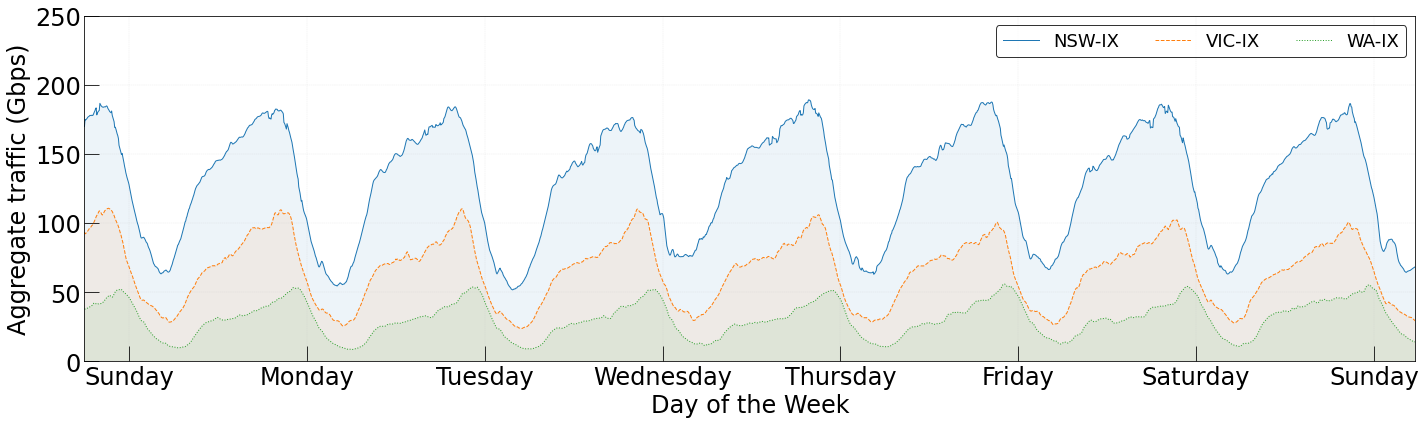

In [1]:
"""
Western Australia (WA-IX), NewSouth Wales (NSW-IX), and Victoria (VIC-IX) IXPs
aggregate traffic over the course of a week. 

Dataset: https://www.ix.asn.au/
"""
import numpy as np 
import math
import pylab as pl
from scipy import stats
import subprocess
import matplotlib as mpl
#from matplotlib import rc
import pandas as df
import time
import datetime

# import pickle as p
#rc('font',**{'family':'serif','serif':['Times']})

#rc('font',**{'family':'serif','serif':['Helvetica']})
#rc('text', usetex=True)


base = df.read_csv("ix-dataset.csv", sep=";") #IX Database.


pl.clf()
#pl.rc('font',family='Times New Roman')
#pl.rcParams["font.family"] = "Times New Roman"

fig, ax = pl.subplots(figsize=(20, 6))

l = 0

for i in base.groupby('Series'):

    if i[0] != 'QLD-IX' and i[0] != 'SA-IX':
        t = np.array(i[1][:]['Time'])
        x = []
        for j in t:
            d = time.mktime(datetime.datetime.strptime(j, "%Y-%m-%d-%H:%M:%S").timetuple())
            x.append(d)

        x = np.array(x) 
        x = x - x.min()
        y = np.array(i[1][:]['Value'])
        y = y/1000000000.00  #(Gbps)
        if i[0] == 'NSW-IX':
            pl.plot(x, y, label=i[0], linewidth=1, linestyle='-')
        elif i[0] == 'VIC-IX':
            pl.plot(x, y, label=i[0], linewidth=1, linestyle='--')
        elif i[0] == 'WA-IX':
            pl.plot(x, y, label=i[0], linewidth=1, linestyle=':')


        ax.fill_between(x, 0,  y,  alpha=0.08)
        if l == 3:
            break
        l = l+1


days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
xtick = [60*60*6 + 60*60*24*i for i in range(8)]
ax.set_xticks(xtick)
ax.set_xticklabels(days, fontsize=10, rotation=0)

fonts = 24

pl.yticks(fontsize=fonts)
pl.xticks(fontsize=fonts)
ax.set_xlabel('Day of the Week' , fontsize=fonts)
ax.set_ylabel('Aggregate traffic (Gbps)' , fontsize=fonts)
ax.set_ylim(ymin=0, ymax=250)
ax.set_xlim(xmin=x.min(), xmax=x.max())

ax.yaxis.grid(color='silver', linestyle='--', linewidth=0.4, alpha=0.4)
ax.xaxis.grid(color='silver', linestyle='--', linewidth=0.4, alpha=0.4)
ax.tick_params(direction='in', length=15)
pl.yticks(fontsize=24)
pl.xticks(fontsize=24)


pl.legend(prop={'size': 18}, ncol=3, edgecolor='black')
fig.tight_layout()
pl.show()
fig.savefig("fig/ix-traffic.pdf")
